In [42]:
import matplotlib.pyplot as plt
import BondGraphTools
from BondGraphTools.config import config
from BondGraphTools.reaction_builder import Reaction_Network
julia = config.julia

# `BondGraphTools`
## Modelling Network Bioenergetics.


https://github.com/peter-cudmore/seminars/ANZIAM-2019

&nbsp;

    Dr. Peter Cudmore.  
    Systems Biology Labratory,   
    The School of Chemical and Biomedical Engineering,  
    The University of Melbourne.  

In this talk i discuss
* Problems in compartmental modelling of cellular processes,
* Some solutions from engineering and physics,
* Software to make life easier.

&nbsp;

For this talk; a *model* is a set of ordinary differential equations.

## Part 1: Problems in Cellular Process Modelling.

<center> <img src="images/map.png"> </center>

<center><i>Parameters (or the lack thereof) are the bane of the mathematical biologists existence!</i></center>

Consinder $S + E = ES = E + P$ (one 'edge' of metabolism).

Assuming mass action, the dynamics are: 
$$\begin{align}
\dot{[S]} &= k_1^b[ES] - k_1^f[E][S],\\
\dot{[E]} &=  (k_1^b + k_2^f)[ES] - [E](k_1^f[S] + k_2^b[P]),\\
\dot{[ES]} &= -(k_1^b + k_2^f)[ES] + [E](k_1^f[S] + k_2^b[P]),\\
\dot{[P]} &= k_2^f[ES] - k_2^f[E][P].
\end{align}
$$

*What are the kinetic parameters $k_1^b, k_1^f, k_2^b, k_2^f$?*

*How do we find them for large systems?*

Can kinetic parameters be estimated from available data?

&nbsp;


<center><h3>No!</h3></center> 

&nbsp;

When fitting data to a system of kinetics parameters may be: 
- unobservable (for example, rate constants from equilibrium data), 
- or *sloppy* (aways underdetermined for a set of data).

Do kinetic parameters generalise across different experiments (and hence can be tabulated)?

&nbsp;



<center><h3>No!</h3></center> 

&nbsp;

At the very least kinetic parameters fail to generalise across temperatures.

For example; physiological conditions are around $37^\circ C$ while labs are around $21^\circ C$.

Do kinetic parameters violate the laws physics?


<center><h3>Often!</h3></center>



&nbsp;

_The principal of detailed balance_ requires that at equilibirum each simple process should be balanced by its reverse process.

This puts constraints on the kinetic parameters which are often broken, for example, by setting $k^b_i = 0$ (no back reaction for that step).

An alternative is to think of kinetic parameters as derived from physical constants!

For instance:
- Oster, G. and Perelson, A. and Katchalsy, A. *Network Thermodynamics*. Nature 1971; 234:5329. 
- Erderer, M. and Gilles, E. D. *Thermodynamically Feasible Kinetic Models of Reaction Networks*. Biophys J. 2007; 92(6): 1846–1857. 
- Saa, P. A. and Nielsen, L. K. *Construction of feasible and accurate kinetic models of metabolism: A Bayesian approach.* Sci Rep. 2016;6:29635.

# Part 2: A Solution via Network Thermodynamics

<center> <img src="images/map.png"> </center>

### Network Thermodynamics

Partitions $S + B = P$ into _components_.

1. Energy Storage.
2. Dissipative Processes.
3. Conservation Laws.

Here:
- Chem. potential acts like _pressure_ or _voltage_.
- Molar flow acts like _velocity_ or _current_.

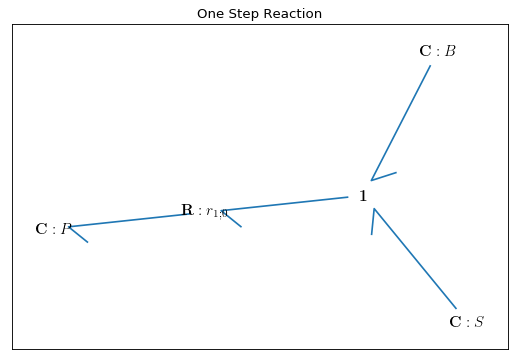

In [49]:
# Reaction Network from BondGraphTools
reaction = Reaction_Network(
    "S + B = P", name="One Step Reaction"
)

model = reaction.as_network_model()
 
# Basic Visualisation.
from BondGraphTools import draw 
figure = draw(model, size=(8,6))

### Kinetic parameters from Network Thermodynamics.

Partitions $S + B = P$  into _components_.

1. Energy Storage Compartments: 
$S$, $B$ and $P$.
2. Dissipative Processes: (The chemical reaction itself).
3. Conservation Laws: (The flow from A is the flow from B and is equal to the flow into reaction).

Gibbs Energy:

$$\mathrm{d}G = P\mathrm{d}v +S\mathrm{d}T + \sum_i\mu_i\mathrm{d}n_i$$

- $\mu_i$ is the Chemical Potential of species $A_i$
- $n_i$ is the amount (in mols) of $A_i$

Chemical Potential is usually modelled as

&nbsp;

$$\mu_i = PT\ln\left(\frac{k_in_i}{V}\right)$$ where $$k_i = \frac{1}{c^\text{ref}}\exp\left[\frac{\mu_i^\text{ref}}{PT}\right]$$

&nbsp;

&nbsp;

- $P$, $T$ and $V$ are pressure, temperature and volume respectively.
- $c^\text{ref}$ is the reference concentration (often $10^{-9} \text{mol/L}$).
- $\mu_i^\text{ref}$ is the reference potential.

<center><i> The reference potential can be tabulated, approximated and (in somecase) directly measured!</i> </center>

Reaction flow $v$ is assumed to obey the Marcelin-de Donder formula:

$$ v \propto \exp\left(\frac{A_f}{PT}\right) - \exp\left(\frac{A_r}{PT}\right)$$

where $A_f, A_r$ are the forward and reverse chemical affinities.

For $S + B = P$, $$A_f = \mu_S + \mu_B \quad \text{and}\quad A_r = \mu_P.$$


### Kinetic parameters from Network Thermodynamics.

For the equation $S + B= P$, in thermodynamic parameters:
&nbsp;

$$
\dot{[P]} = \kappa(k_Sk_B[S][B] - k_P[P])
$$

Here $$k^f = \kappa k_Sk_B, \quad k^b = \kappa k_P, \quad \text{with} \quad k_i = \frac{1}{c^\text{ref}}\exp\left[\frac{\mu_i^\text{ref}}{PT}\right], \quad \kappa > 0.$$

*$k^f$ and $k^b$ are now related to physical constants!*

# Part 3: Network Thermodynamics with `BondGraphTools`

<center> <img src="images/map.png"> </center>

In [3]:
import BondGraphTools
help(BondGraphTools)

Help on package BondGraphTools:

NAME
    BondGraphTools

DESCRIPTION
    BondGraphTools
    BondGraphTools is a python library for symbolic modelling and control of multi-physics
    systems using bond graphs. Bond graph modelling is a network base framework concerned
    with the distribution of energy and the flow of power through lumped-element or
    compartmental models of physical system.
    
    Package Documentation::
    
        https://bondgraphtools.readthedocs.io/
    
    Source::
    
        https://github.com/BondGraphTools/BondGraphTools
    
    Bug reports:
    
        https://github.com/BondGraphTools/BondGraphTools/issues
    
    
    Simple Example
    --------------
    
    Build and simulate a RLC driven RLC circuit::
    
        import BondGraphTools as bgt
    
        # Create a new model
        model = bgt.new(name="RLC")
    
        # Create components
        # 1 Ohm Resistor
        resistor = bgt.new("R", name="R1", value=1.0)
    
        # 1 H

### Network Energetics
Network Energetics, which includes Network Thermodynamics partitions $S + B = P$ into _components_.

1. Energy Storage Compartments: $C: S$, $C: B$ and $C: P$.
2. Dissipative Processes: $R: r_{1;0}$
3. Conservation Laws: $1$ (common flow).

*Bond Graphs represent of energy networks.*

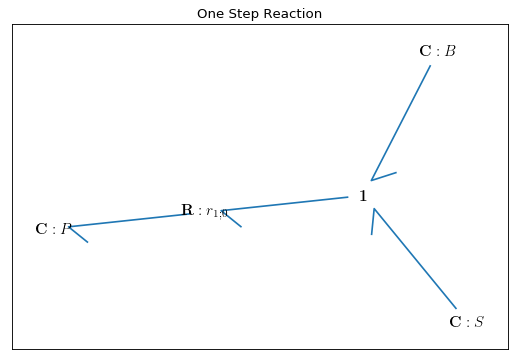

In [41]:
#from BondGraphTools.reaction_builder
# import Reaction_Network

reaction = Reaction_Network(
    "S + B = P", name="One Step Reaction"
)
model = reaction.as_network_model()

# Basic Visualisation.
from BondGraphTools import draw 
figure = draw(model, size=(8,6))


In [47]:
# Initialise latex printing
from sympy import init_printing
init_printing() 
# Print the equations of motion
model.constitutive_relations

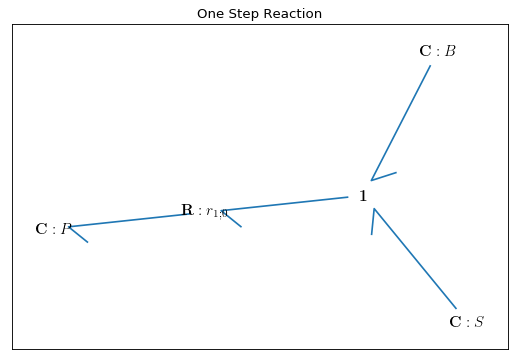

In [46]:
figure

In [45]:
for v in model.state_vars:
    (component, local_v) = model.state_vars[v]
    meta_data = component.state_vars[local_v]
    print(f"{v} is {component}\'s {meta_data}")

x_0 is C: S's Molar Amount
x_1 is C: B's Molar Amount
x_2 is C: P's Molar Amount


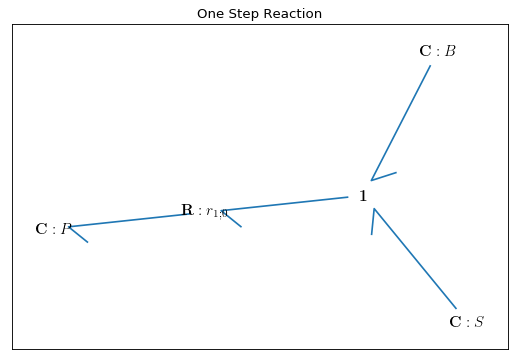

In [35]:
#
#
figure

### A peak under the hood

In `BondGraphTools`, components have a number of power ports defined such that the power $P_i$ entering the $i$th port is $P_i = e_if_i$

The power vaiables $(e,f)$ are related to the component state variables $(x, \mathrm{d}x)$ by _constitutive relations_.

In [9]:
from BondGraphTools import new

chemical_potential = new("Ce", library="BioChem")
chemical_potential.constitutive_relations

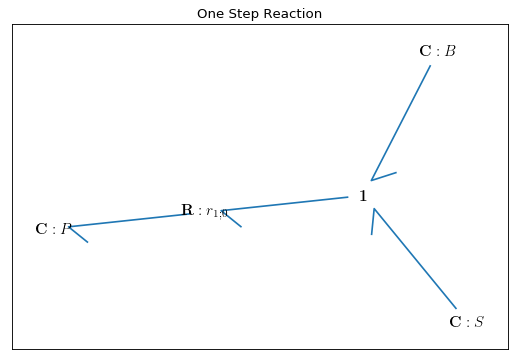

In [32]:
figure

##### A peak under the hood (cont.) 

The harpoons represent _shared power variables_.

For example the harpoon from port 1 on $R: r_{1;0}$ to $C:P$ indiciates that


$$
f^{C:P}_0 = - f^{R:r_{1;0}}_1 \qquad 
e^{C:P}_0 = e^{R:r_{1;0}}_1 
$$
&nbsp;

so that power is conserved through the connection

&nbsp;
$$
P^{C:P}_0 + P^{R:r_{1;0}}_1  = 0
$$


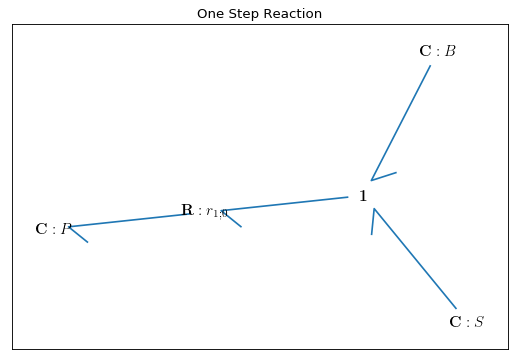

In [34]:
figure

##### A peak under the hood (cont.)
The resulting system is of the form:
$$
LX + V(X) = 0
$$ 
&nbsp;
where 

$$
X = \left(\frac{\mathrm{d}\mathbf{x}}{\mathrm{d}t}, 
\mathbf{e},
\mathbf{f}, 
\mathbf{x},
\mathbf{u}\right)^T
$$
&nbsp;
- $\mathbf{e},\mathbf{f}$ vectors of power variables
- $\mathrm{d}\mathbf{x}, \mathbf{x}$ similarly state variables.
- and $\mathbf{u}$ control variables
- $L$ is a sparse matrix
- $V$ is a nonlinear vector field.

### So what does this have to do with parameters?

Having a network energetics library allows for:
- automation via dataflow scripting (eq; `request`, `xlrd`),
- 'computational modularity' for model/parameter reuse,
- intergration with existing parameter estimators,
- use with your favourite data analysis technology.

*Enables the tabuation of paramaters!*

### Why Python?

- open source, commonly available and commonly used
- 'executable pseudocode' (easy to read) and excellent for rapid development
- great libraries for both science and general purpose computing
- excellent quality management tools
- pacakge management, version control

*`BondGraphTools` is developed with sustainable development practices.*

##  `BondGraphTools` now and in the future.

#### Current Version

Version 0.3.6 (on PyPI) is being used by in the Systems Biology Lab:
- Prof. Peter Gawrthop (mitochondrial electron transport).
- Michael Pan (ionic homeostasis).
- Myself (coupled oscillators, synthetic biology)

#### Features Already Implemented
- Component libraries, (mechotronic and biochem)
- Numerical simulations,
- Control variables,
- Stiochiometric analysis

The big challenge: _scaling up_!

# Thanks for Listening!
Thanks to:
- Prof. Edmund Crampin Prof. Peter Gawthrop, Michael Pan & The Systems Biology Lab. 
- The University of Melbourne 
- The ARC Center of Excellence for Convergent Bio-Nano Science.
- ANZIAM Organisers and sessions chairs, and Victoria University.

Please check out `BondGraphTools` 
- documentation at [bondgraphtools.readthedocs.io](http://bondgraphtools.readthedocs.io)
- source at [https://github.com/BondGraphTools](https://github.com/BondGraphTools)